In [ ]:
import pandas as pd
import numpy as np 
import sqlite3
import re
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   README.rst
 BAAD16DATASET			   requirements
 bengali_stemmer		   samledata.csv
 bengali-stemmer-dev		   setup.cfg
 bengali_stemmer.egg-info	   setup.py
 bengali_word2vec		   stemmer.ipynb
 bengali_word2vec.model		   Stopwords.csv
 bn_glove.39M.300d.txt		   stopwordsnew.csv
 build				   tests
 cc.bn.300.vec			   try_w2v.ipynb
'Copy of ulm_train.csv'		   ulm1.csv
 dist				   ulm2.csv
 LICENSE			   wbc.ipynb
'naivebias on bangla news.ipynb'   word2vec.ipynb
'new data.ipynb'		  'word2veclast try.ipynb'
 pytest.ini


In [ ]:
data = pd.read_csv('ulm1.csv',error_bad_lines=False)

In [ ]:
data.shape

(300, 3)

In [ ]:
final = data.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final.shape

(300, 3)

In [ ]:
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")

In [ ]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word1 in cleanhtml(w).split():
                for cleaned_word in clean_punct(cleaned_word1).split():
                    if len(cleaned_word)>2:
                        if(to_encode(cleaned_word) not in set_stop):
                            s = stemmer.stem_word(cleaned_word)
                            if len(s)>2:
                                final_words.append(s)
                                filtered_sentence.append(s)
                        else:
                            continue
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X_train = pre_process(final['text'].values)
y_train = final['label'].values

In [ ]:
data1 = pd.read_csv('ulm2.csv')

In [ ]:
data1.shape

(1800, 3)

In [ ]:
final1=data1.drop_duplicates(subset={"label","text"},keep='first',inplace=False)
final1.shape

(1751, 3)

In [ ]:
X_test = pre_process(final1['text'].values)
y_test = final1['label'].values

In [ ]:
labels=np.unique(y_train)

In [ ]:
labels

array(['fe', 'hm', 'ij', 'mk', 'rg', 'rn'], dtype=object)

## **MULTINOMIAL NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=.01)),
              ])
Gmodel = nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)


print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))


Cross val score: [0.71666667 0.75       0.78333333 0.65       0.75      ]
accuracy 0.7464306110793832
accuracy normalized 1307
              precision    recall  f1-score   support

          fe       0.73      0.76      0.74       300
          hm       0.83      0.63      0.71       251
          ij       0.86      0.83      0.85       300
          mk       0.70      0.80      0.75       300
          rg       0.70      0.70      0.70       300
          rn       0.70      0.74      0.72       300

    accuracy                           0.75      1751
   macro avg       0.75      0.74      0.75      1751
weighted avg       0.75      0.75      0.75      1751



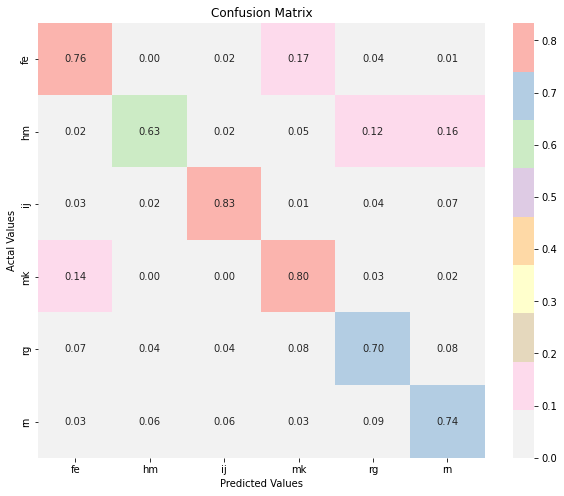

In [ ]:
# Naive BaYES Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **svm**

In [ ]:
from sklearn.linear_model import SGDClassifier
svm = Pipeline([('vect', CountVectorizer()), #pipeline works one after another
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=10000, tol=None)),
              ])
Gmodel=svm.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)

print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))

Cross val score: [0.73333333 0.66666667 0.63333333 0.66666667 0.78333333]
accuracy 0.7173043974871502
accuracy normalized 1256
              precision    recall  f1-score   support

          fe       0.74      0.72      0.73       300
          hm       0.78      0.64      0.70       251
          ij       0.78      0.80      0.79       300
          mk       0.67      0.75      0.71       300
          rg       0.67      0.71      0.69       300
          rn       0.69      0.68      0.68       300

    accuracy                           0.72      1751
   macro avg       0.72      0.72      0.72      1751
weighted avg       0.72      0.72      0.72      1751



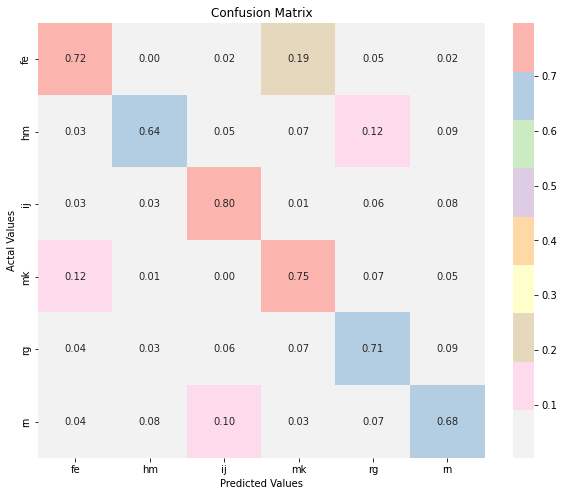

In [ ]:
# SVM Creating  a confusion matrix,which compares the y_test and y_pred


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' )),
              ])
Gmodel=lr.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)

print("Cross val score:",cross_val_score(Gmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))



Cross val score: [0.65       0.61666667 0.63333333 0.68333333 0.65      ]
accuracy 0.7115933752141633
accuracy normalized 1246
              precision    recall  f1-score   support

          fe       0.72      0.73      0.73       300
          hm       0.70      0.64      0.67       251
          ij       0.77      0.85      0.81       300
          mk       0.70      0.77      0.73       300
          rg       0.71      0.58      0.64       300
          rn       0.67      0.68      0.68       300

    accuracy                           0.71      1751
   macro avg       0.71      0.71      0.71      1751
weighted avg       0.71      0.71      0.71      1751



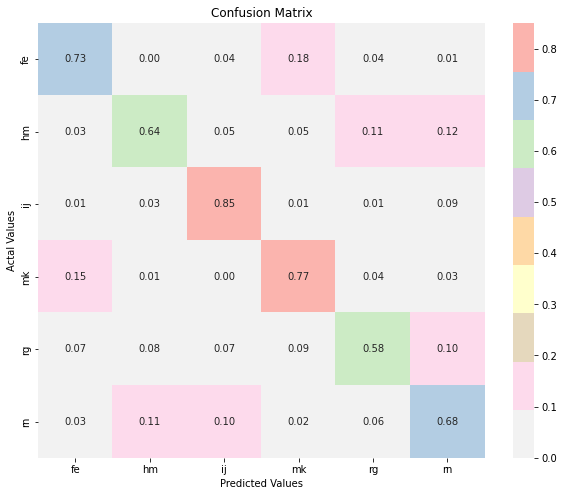

In [ ]:
# lOGISTIC Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn . model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier ( n_estimators=100 )

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier ( n_estimators=100 )),
              ])
Rmodel=lr.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)

print("Cross val score:",cross_val_score(Rmodel,X_train,y_train,cv=5,scoring='accuracy'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('accuracy normalized %s' % accuracy_score(y_pred, y_test, normalize=False))
print(classification_report(y_test, y_pred,target_names=labels))



Cross val score: [0.68333333 0.66666667 0.71666667 0.75       0.73333333]
accuracy 0.759565962307253
accuracy normalized 1330
              precision    recall  f1-score   support

          fe       0.78      0.80      0.79       300
          hm       0.74      0.73      0.73       251
          ij       0.84      0.89      0.86       300
          mk       0.71      0.82      0.76       300
          rg       0.73      0.66      0.69       300
          rn       0.76      0.66      0.71       300

    accuracy                           0.76      1751
   macro avg       0.76      0.76      0.76      1751
weighted avg       0.76      0.76      0.76      1751



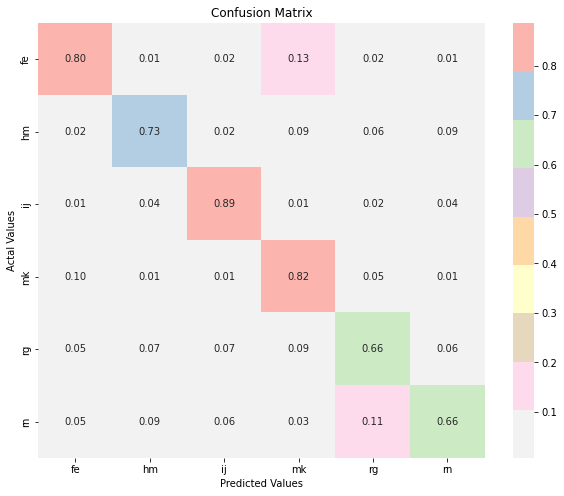

In [ ]:
# random forest Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'],

                     columns = ['fe', 'hm', 'ij', 'mk', 'rg', 'rn'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()